In [0]:
import numpy as np
import pandas as pd
import scipy.stats as ss
import matplotlib.pyplot as plt

plt.style.use('seaborn')

In [2]:
from google.colab import drive
drive.mount('mydrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at mydrive


In [3]:
environment = pd.read_csv('/content/mydrive/My Drive/IE - Statistics and Data Analysis - DUAL - 2019/DataSets/environment.csv')
environment.head(5)

,opinion,affiliation
0,a great deal,EU
1,a great deal,EU
2,a great deal,EU
3,a great deal,EU
4,a great deal,EU


**The dataset `environment` contains data from a questionnaire to IE students and EU general citizns on their opinion about the concern on the possible complete melting of the northern ice cap**

Let's find out which are the different levels of the categorical variables

In [4]:
environment['affiliation'].unique()

array(['EU', 'IE'], dtype=object)

In [5]:
environment['opinion'].unique()

array(['a great deal', 'some', 'a little', 'not at all'], dtype=object)

In [6]:
freqs = pd.crosstab(environment['opinion'],
                    environment['affiliation'])
freqs

affiliation,EU,IE
opinion,,
a great deal,454,69
a little,52,4
not at all,50,2
some,124,30


In [7]:
proportions = pd.DataFrame({'EU': freqs['EU']/freqs['EU'].sum(),
                            'IE': freqs['IE']/freqs['IE'].sum()})
proportions

,EU,IE
opinion,,
a great deal,0.667647,0.657143
a little,0.076471,0.038095
not at all,0.073529,0.019048
some,0.182353,0.285714


**Let's find if there is a significant difference between the proportion of IE students and EU citizens that have have "some" concern about the complete melting of the northern ice cap, for a 2% of significance level**

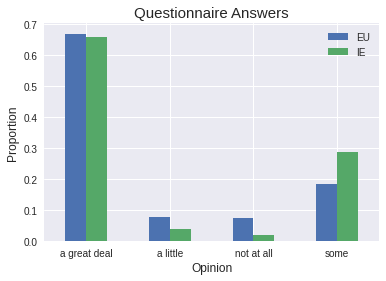

In [8]:
proportions.plot(kind = 'bar')
plt.xlabel('Opinion', fontsize = 12)
plt.ylabel('Proportion', fontsize = 12)
plt.title('Questionnaire Answers', fontsize = 15)
plt.xticks(rotation = 0)
plt.show()

Let's find all the quantities needed from our sample

In [0]:
# IE Students
n_IE = freqs['IE'].sum()
p_IE = proportions.loc['some', 'IE']
q_IE = 1 - p_IE


# EU citizens
n_EU = freqs['EU'].sum()
p_EU = proportions.loc['some', 'EU']
q_EU = 1 - p_EU

Let's check normality

In [10]:
# IE students
if n_IE * p_IE > 10:
  if n_IE * q_IE > 10:
    print('The IE population CAN be approximated to a normal distribution')
else:
  print('The IE population CANNOT be approximated to a normal distribution')

# EU citizens
if n_EU * p_EU > 10:
  if n_EU * q_EU > 10:
    print('The EU population CAN be approximated to a normal distribution')
else:
  print('The EU population CANNOT be approximated to a normal distribution')

The IE population CAN be approximated to a normal distribution
The EU population CAN be approximated to a normal distribution


Since the normality check passed, we can find the normal confidence interval for the difference of population proportions

\begin{equation}
P_{EU} - P_{IE} \in \hat p_{EU}-\hat p_{IE}\pm z_{\alpha/2}\sqrt{\frac{\hat p_{EU}(1-\hat p_{EU})}{n_{EU}}+\frac{\hat p_{IE}(1-\hat p_{IE})}{n_{IE}}}
\end{equation}

Let's find it 

In [11]:
# Difference in sample proportions
diff = p_EU - p_IE

# Confidence/Significance Level
SL = 0.02
CL = 1 - SL

# z-value
zval = ss.norm.isf(SL/2)

# Margin of Error
ME = zval * np.sqrt(p_EU * (1 - p_EU)/n_EU + p_IE * (1 - p_IE)/n_IE)

# Boundaries
lower = diff - ME
upper = diff + ME

# Print the output
print('The {:1.0%} CL for the difference in population proportions is [{:1.4f}, {:1.4f}]'.format(CL, lower, upper))

The 98% CL for the difference in population proportions is [-0.2116, 0.0048]


Since the Confidence Interval contains the value 0, we are 98% confident that there is no difference between the propotion of IE students and EU citizens that felt "some" concern about the complete melting of the northern ice cap

Let's now perform the hypothesis testing under the assumption of equality of proportions, 

\begin{equation}
H_0:\{P_{EU} = P_{IE}\},\quad H_1:\{P_{EU} \neq P_{IE}\}
\end{equation}

this implies that we are going to use the pooled sample proportion

\begin{equation}
\hat p = \frac{x_1 + x_2}{n_1 + n_2}
\end{equation}

In [12]:
# EU citizens
x_EU = freqs.loc['some', 'EU']

# IE students
x_IE = freqs.loc['some', 'IE']

# pooled sample proportion
phat = (x_IE + x_EU)/(n_IE + n_EU)
print('The pooled sample proportion is {:1.5f}'.format(phat))

The pooled sample proportion is 0.19618


Let's perform the test

In [14]:
# test statistic
zstat = diff/np.sqrt(phat * (1-phat) * (1/n_IE + 1/n_EU))
pval = 2 * ss.norm.cdf(zstat)

# Perform the Test
if pval < SL:
  print('zStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.2f}\n\nReject H0'.format(zstat, pval, SL))
else:
  print('zStat: {:4.3f}\npval: {:4.3f}\nalpha: {:4.2f}\n\nFail to Reject H0'.format(zstat, pval, SL))

zStat: -2.482
pval: 0.013
alpha: 0.02

Reject H0


Note that we have used the cumulative distribution to find the p-value because the z-test statistic is negative. Now, since the p-value is smaller than the significance level, this implies that we find evidence from our sample in favor of the alternative hypothesis, for a 2% of significance level. 

Therefore our conclusion is that the proportion of IE students and EU citizens who feel some concern about the complete melting of the ice cap is significantly different for a 2% of significance level.

This is in no agreement with the previous result because of the approximation we have made in the imposition of a pooled sample proportion. Try to do this same exercise using explicitly the sample proportions for the computation of the z-test statistic.